In [1]:
import numpy as np
import matplotlib.pylab as plt
from copy import copy as cp
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import sys
sys.path.append('..')
import math
import copy

In [2]:
# Defining the class
class NeumannPixel:
    def report(self):
        print('For this instance ...')
        print('   ix and iy are:', self.ix,self.iy)
        print('   fluxes are:', self.flux_up,self.flux_down,self.flux_left,self.flux_right)
    def get_positions(self):
        return(self.ix,self.iy)

In [23]:
class PixelArray:
#creating lists of x, y, and xy values
    def make_edgearray(self,k):
        theta = math.pi/3
        self.xylist = []
        self.xlist = []
        self.ylist = []
        for i in range (k):
            x = i
            y = 0
            self.xlist.append(x)
            self.ylist.append(y)
            self.xylist.append([x,y])
        for i in range (k):
            x_old = self.xlist[i]
            y_old = self.ylist[i]
            x = int(x_old*(math.cos(-theta))-y_old*(math.sin(theta)))+k
            y = int(x_old*(math.sin(-theta))+y_old*(math.cos(theta)))
            self.xlist.append(x)
            self.ylist.append(y)
            self.xylist.append([x,y])
        for i in range (k):
            x_old = self.xlist[i]
            y_old = self.ylist[i]
            x = int(x_old*(math.cos(theta))-y_old*(math.sin(theta)))+k
            y = int(x_old*(math.sin(theta))+y_old*(math.cos(theta)))-int(math.sin(theta)*k*2)
            self.xlist.append(x)
            self.ylist.append(y)
            self.xylist.append([x,y])
        for i in range (k):
            x = i
            y = -int(math.sin(theta)*k*2)
            self.xlist.append(x)
            self.ylist.append(y)
            self.xylist.append([x,y])
        for i in range (k):
            x_old = self.xlist[i]
            y_old = self.ylist[i]
            x = int(x_old*(math.cos(2*theta))-y_old*(math.sin(2*theta)))
            y = int(x_old*(math.sin(2*theta))+y_old*(math.cos(2*theta)))-int(math.sin(theta)*k*2)
            self.xlist.append(x)
            self.ylist.append(y)
            self.xylist.append([x,y])
        for i in range (k):
            x_old = self.xlist[i]
            y_old = self.ylist[i]
            x = int(x_old*(math.cos(-2*theta))-y_old*(math.sin(2*theta)))
            y = int(x_old*(math.sin(-2*theta))+y_old*(math.cos(2*theta)))
            self.xlist.append(x)
            self.ylist.append(y)
            self.xylist.append([x,y])
# finding the duplicate pixels to add to a droplist of droppable indices
        self.droplist = []
        for i in range (len(self.xylist)-1):
            for j in range (i+1, len(self.xylist)):
                if (self.xylist[i]==self.xylist[j]):
                    self.droplist.append(j)
# organizing the droplist to not have dublicate indices and putting in decreasing order
        self.result = []
        for i in self.droplist:
            if i not in self.result:
                self.result.append(i)
        self.result.sort(reverse = True)
# dropping duplicate indices from the three lists
        for i in range (len(self.result)):
            self.xylist.pop(self.result[i])
            self.xlist.pop(self.result[i])
            self.ylist.pop(self.result[i])
# creating an edge pixel list from x and y values
        self.pixellist_edge = []
        for i in range (len(self.xylist)):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = self.xlist[i]
            neumannpixel.iy = self.ylist[i]
            self.pixellist_edge.append(neumannpixel)
            
# making outside array xy points            
    def make_outsidearray(self,k):
# for xy values
        self.outsidex = []
        self.outsidey = []
        self.outsidexy = []
# for flux values (edge direction=1)
        self.flux_up = []
        self.flux_right = []
        self.flux_down = []
        self.flux_left = []
        v = -int(math.sin(math.pi/3)*k*2)
        for i in range (len(self.xylist)):
            if (self.xlist[i] == 0 and self.ylist[i] == 0):
                x = self.xlist[i]-1
                y = self.ylist[i]
                up = 0
                right = 1
                down = 0
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
                x = self.xlist[i]
                y = self.ylist[i]+1
                up = 0
                right = 0
                down = 1
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
            elif (0 < self.xlist[i] < k and self.ylist[i] == 0):
                x = self.xlist[i]
                y = self.ylist[i]+1
                up = 0
                right = 0
                down = 1
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
            elif (self.xlist[i] == k and self.ylist[i] == 0):
                x = self.xlist[i]
                y = self.ylist[i]+1
                up = 0
                right = 0
                down = 1
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
                x = self.xlist[i]+1
                y = self.ylist[i]
                up = 0
                right = 0
                down = 1
                left = 1
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
            elif (self.xlist[i] > k and self.ylist[i] < 0):
                x = self.xlist[i]+1
                y = self.ylist[i]
                if (self.xlist[i] == self.xlist[i+1] and self.ylist[i] == self.ylist[i+1]+1):
                    up = 0
                else:
                    up = 1
                if (self.xlist[i] == self.xlist[i+1] and self.ylist[i] == self.ylist[i+1]-1):
                    down = 0
                else:
                    down = 1
                right = 0
                left = 1
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
            elif (self.xlist[i] == k and self.ylist[i] < 0):
                x = self.xlist[i]+1
                y = self.ylist[i]
                up = 1
                right = 0
                down = 0
                left = 1
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
                x = self.xlist[i]
                y = self.ylist[i]-1
                up = 1
                right = 0
                down = 0
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
            elif (0 < self.xlist[i] < k and self.ylist[i] < 0):
                x = self.xlist[i]
                y = self.ylist[i]-1
                up = 1
                right = 0
                down = 0
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
            elif (self.xlist[i] == 0 and self.ylist[i] == v):
                x = self.xlist[i]
                y = self.ylist[i]-1
                up = 1
                right = 0
                down = 0
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
                x = self.xlist[i]-1
                y = self.ylist[i]
                up = 0
                right = 1
                down = 0
                left = 0
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
            elif (self.xlist[i] <= 0 and v < self.ylist[i] < 0):
                x = self.xlist[i]-1
                y = self.ylist[i]
                if i < (len(self.xylist)-1):
                    if (self.xlist[i] == self.xlist[i+1] and self.ylist[i] == self.ylist[i+1]+1):
                        up = 0
                    else:
                        up = 1
                    if (self.xlist[i] == self.xlist[i+1] and self.ylist[i] == self.ylist[i+1]-1):
                        down = 0
                    else:
                        down = 1
                else:
                    up = 0
                    down = 0
                right = 0
                left = 1
                self.outsidex.append(x)
                self.outsidey.append(y)
                self.outsidexy.append([x,y])
                self.flux_up.append(up)
                self.flux_right.append(right)
                self.flux_down.append(down)
                self.flux_left.append(left)
# finding indices of duplicates from edge in outside and sorting in decreasing order
        self.droplist2 = []
        for i in range (len(self.outsidexy)-1):
            for j in range (len(self.xylist)):
                if (self.outsidexy[i]==self.xylist[j]):
                    self.droplist2.append(i)
        self.droplist2.sort(reverse = True)
# removing duplicates
        for i in range (len(self.droplist2)):
            self.outsidex.pop(self.droplist2[i])
            self.outsidey.pop(self.droplist2[i])
            self.outsidexy.pop(self.droplist2[i])
            self.flux_up.pop(self.droplist2[i])
            self.flux_right.pop(self.droplist2[i])
            self.flux_down.pop(self.droplist2[i])
            self.flux_left.pop(self.droplist2[i])
# creating an edge pixel list from x and y values
        self.pixellist_outside = []
        for i in range (len(self.outsidexy)):
            neumannpixel = NeumannPixel()
            neumannpixel.ix = self.outsidex[i]
            neumannpixel.iy = self.outsidey[i]
            neumannpixel.flux_up = self.flux_up[i]
            neumannpixel.flux_right = self.flux_right[i]
            neumannpixel.flux_down = self.flux_down[i]
            neumannpixel.flux_left = self.flux_left[i]
            self.pixellist_outside.append(neumannpixel)
            
            
# making an array to fill the space
    def make_fillarray(self,k):
        self.pixellist_fill = []
        v = -int(math.sin(math.pi/3)*k*2)
#         for p in range (k):
#             for i in range (-1*self.pixellist_edge[4*k+p].iy+self.pixellist_edge[5*k+p].iy+1):
#                 neumannpixel = NeumannPixel()
#                 neumannpixel.ix = self.pixellist_edge[5*k+p].ix
#                 neumannpixel.iy = self.pixellist_edge[5*k+p].iy-i
#                 self.fillpixellist.append(neumannpixel)
        for i in range (k+1):
            for j in range (-v+1):
                neumannpixel = NeumannPixel()
                neumannpixel.ix = i
                neumannpixel.iy = -j
                self.pixellist_fill.append(neumannpixel)
#         for i in range ():
#             for j in range ():
#                 neumannpixel = NeumannPixel()
#                 neumannpixel.ix = 
#                 neumannpixel.iy = 
#                 self.pixellist_fill.append(neumannpixel)
        


                
                
# value report calls
    def report_edgex(self):
        print('edge x list has ', len(self.xlist), ' values')
        print(self.xlist)
    def report_edgey(self):
        print('edge y list has ', len(self.ylist), ' values')
        print(self.ylist)
    def report_edgexy(self):
        print('edge xy list has ', len(self.xylist), ' values')
        print(self.xylist)
    def report_edge(self):
        print('edge list has ', len(self.pixellist_edge), ' pixels')
        for neumannpixel in self.pixellist_edge:
            print(neumannpixel.ix, neumannpixel.iy)
    def report_outsidexy(self):
        print('outside xy list has ', len(self.outsidexy), ' values')
        print(self.outsidexy)
    def report_outside(self):
        print('outside list has ', len(self.pixellist_outside), ' pixels')
        for neumannpixel in self.pixellist_outside:
            print(neumannpixel.ix, neumannpixel.iy)
    def report_fluxes(self):
        for neumannpixel in self.pixellist_outside:
            print('place=',neumannpixel.ix,neumannpixel.iy,'up=',neumannpixel.flux_up, \
                  'right=',neumannpixel.flux_right,'down=',neumannpixel.flux_down,'left=',neumannpixel.flux_left)


            
# plotting calls
    def plot(self):
        plt.figure()
        plt.gca().set_aspect('equal')
        plt.grid(True)
        for neumannpixel in self.pixellist_edge:
            plt.plot(neumannpixel.ix,neumannpixel.iy, 'ro')
        for neumannpixel in self.pixellist_outside:
            plt.plot(neumannpixel.ix, neumannpixel.iy, 'kx')
        for neumannpixel in self.pixellist_fill:
            plt.plot(neumannpixel.ix,neumannpixel.iy, 'bx')

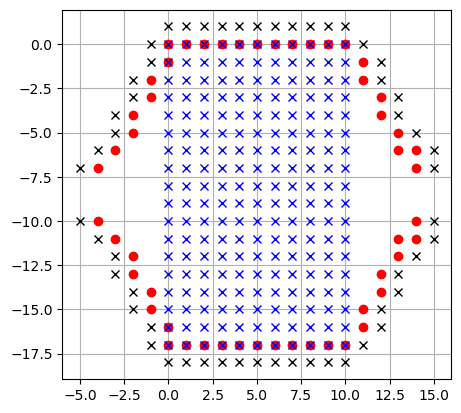

In [24]:
pixelarray1 = PixelArray()
pixelarray1.make_edgearray(10)
pixelarray1.make_outsidearray(10)
pixelarray1.make_fillarray(10)
pixelarray1.plot()
# pixelarray1.report_fluxes()

In [25]:
whos

Variable         Type            Data/Info
------------------------------------------
AssignQuantity   type            <class 'pint.Quantity'>
NeumannPixel     type            <class '__main__.NeumannPixel'>
PixelArray       type            <class '__main__.PixelArray'>
UnitRegistry     RegistryMeta    <class 'pint.registry.UnitRegistry'>
copy             module          <module 'copy' from '/Use<...>/lib/python3.11/copy.py'>
cp               function        <function copy at 0x100a52b60>
math             module          <module 'math' from '/Use<...>h.cpython-311-darwin.so'>
np               module          <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pixelarray1      PixelArray      <__main__.PixelArray object at 0x1344c2690>
plt              module          <module 'matplotlib.pylab<...>ges/matplotlib/pylab.py'>
sys              module          <module 'sys' (built-in)>
